# Librerias

In [ ]:
!pip install wordcloud seaborn

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date
from wordcloud import WordCloud 
import seaborn as sns 

# Lectura de archivo

In [4]:
data = pd.read_csv("spotify_history.csv")
data

,endTime,artistName,trackName,msPlayed
0,2019-06-09 22:58,Serú Girán,Eiti-Leda,137690
1,2019-06-10 09:15,Luis Alberto Spinetta,Rezo por Vos (En Vivo) (feat. Charly García),1021
2,2019-06-10 10:02,Sui Generis,Canción para Mi Muerte,215893
3,2019-06-10 10:06,Sui Generis,Rasguña Las Piedras,191226
4,2019-06-10 10:11,Charly García,Cerca De La Revolucion,280546
...,...,...,...,...
22667,2020-06-10 23:33,Laura Branigan,Self Control,917
22668,2020-06-10 23:33,Billy Joel,Piano Man,197
22669,2020-06-10 23:33,Imagine Dragons,Believer,928
22670,2020-06-10 23:36,Vinnie Moore,The Maze,177412


# Fomateo de data

In [5]:
data["playTime"] = pd.to_datetime(data["endTime"])
data

,endTime,artistName,trackName,msPlayed,playTime
0,2019-06-09 22:58,Serú Girán,Eiti-Leda,137690,2019-06-09 22:58:00
1,2019-06-10 09:15,Luis Alberto Spinetta,Rezo por Vos (En Vivo) (feat. Charly García),1021,2019-06-10 09:15:00
2,2019-06-10 10:02,Sui Generis,Canción para Mi Muerte,215893,2019-06-10 10:02:00
3,2019-06-10 10:06,Sui Generis,Rasguña Las Piedras,191226,2019-06-10 10:06:00
4,2019-06-10 10:11,Charly García,Cerca De La Revolucion,280546,2019-06-10 10:11:00
...,...,...,...,...,...
22667,2020-06-10 23:33,Laura Branigan,Self Control,917,2020-06-10 23:33:00
22668,2020-06-10 23:33,Billy Joel,Piano Man,197,2020-06-10 23:33:00
22669,2020-06-10 23:33,Imagine Dragons,Believer,928,2020-06-10 23:33:00
22670,2020-06-10 23:36,Vinnie Moore,The Maze,177412,2020-06-10 23:36:00


In [6]:
data['year'] = pd.DatetimeIndex(data["playTime"]).year
data['month'] = pd.DatetimeIndex(data["playTime"]).month
data['day'] = pd.DatetimeIndex(data["playTime"]).day
data['weekday'] = pd.DatetimeIndex(data["playTime"]).weekday
data['time'] = pd.DatetimeIndex(data["playTime"]).time
data['hours'] = pd.DatetimeIndex(data["playTime"]).hour
data['day-name'] = data["playTime"].apply(lambda x: x.day_name())
data['Count'] = 1 

In [7]:
data

,endTime,artistName,trackName,msPlayed,playTime,year,month,day,weekday,time,hours,day-name,Count
0,2019-06-09 22:58,Serú Girán,Eiti-Leda,137690,2019-06-09 22:58:00,2019,6,9,6,22:58:00,22,Sunday,1
1,2019-06-10 09:15,Luis Alberto Spinetta,Rezo por Vos (En Vivo) (feat. Charly García),1021,2019-06-10 09:15:00,2019,6,10,0,09:15:00,9,Monday,1
2,2019-06-10 10:02,Sui Generis,Canción para Mi Muerte,215893,2019-06-10 10:02:00,2019,6,10,0,10:02:00,10,Monday,1
3,2019-06-10 10:06,Sui Generis,Rasguña Las Piedras,191226,2019-06-10 10:06:00,2019,6,10,0,10:06:00,10,Monday,1
4,2019-06-10 10:11,Charly García,Cerca De La Revolucion,280546,2019-06-10 10:11:00,2019,6,10,0,10:11:00,10,Monday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22667,2020-06-10 23:33,Laura Branigan,Self Control,917,2020-06-10 23:33:00,2020,6,10,2,23:33:00,23,Wednesday,1
22668,2020-06-10 23:33,Billy Joel,Piano Man,197,2020-06-10 23:33:00,2020,6,10,2,23:33:00,23,Wednesday,1
22669,2020-06-10 23:33,Imagine Dragons,Believer,928,2020-06-10 23:33:00,2020,6,10,2,23:33:00,23,Wednesday,1
22670,2020-06-10 23:36,Vinnie Moore,The Maze,177412,2020-06-10 23:36:00,2020,6,10,2,23:36:00,23,Wednesday,1


In [8]:
data["timePlayed (hh-mm-ss)"] = pd.to_timedelta(data["msPlayed"], unit='ms')

In [9]:
def hours(td):
    '''To get the hour information'''
    return td.seconds/3600

def minutes(td):
    '''To get the minutes information'''
    return (td.seconds/60)%60

data["Listening Time (Hours)"] = data["timePlayed (hh-mm-ss)"].apply(hours).round(3)
data["Listening Time (Minutes)"] = data["timePlayed (hh-mm-ss)"].apply(minutes).round(3)
data

,endTime,artistName,trackName,msPlayed,playTime,year,month,day,weekday,time,hours,day-name,Count,timePlayed (hh-mm-ss),Listening Time (Hours),Listening Time (Minutes)
0,2019-06-09 22:58,Serú Girán,Eiti-Leda,137690,2019-06-09 22:58:00,2019,6,9,6,22:58:00,22,Sunday,1,0 days 00:02:17.690000,0.038,2.283
1,2019-06-10 09:15,Luis Alberto Spinetta,Rezo por Vos (En Vivo) (feat. Charly García),1021,2019-06-10 09:15:00,2019,6,10,0,09:15:00,9,Monday,1,0 days 00:00:01.021000,0.000,0.017
2,2019-06-10 10:02,Sui Generis,Canción para Mi Muerte,215893,2019-06-10 10:02:00,2019,6,10,0,10:02:00,10,Monday,1,0 days 00:03:35.893000,0.060,3.583
3,2019-06-10 10:06,Sui Generis,Rasguña Las Piedras,191226,2019-06-10 10:06:00,2019,6,10,0,10:06:00,10,Monday,1,0 days 00:03:11.226000,0.053,3.183
4,2019-06-10 10:11,Charly García,Cerca De La Revolucion,280546,2019-06-10 10:11:00,2019,6,10,0,10:11:00,10,Monday,1,0 days 00:04:40.546000,0.078,4.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22667,2020-06-10 23:33,Laura Branigan,Self Control,917,2020-06-10 23:33:00,2020,6,10,2,23:33:00,23,Wednesday,1,0 days 00:00:00.917000,0.000,0.000
22668,2020-06-10 23:33,Billy Joel,Piano Man,197,2020-06-10 23:33:00,2020,6,10,2,23:33:00,23,Wednesday,1,0 days 00:00:00.197000,0.000,0.000
22669,2020-06-10 23:33,Imagine Dragons,Believer,928,2020-06-10 23:33:00,2020,6,10,2,23:33:00,23,Wednesday,1,0 days 00:00:00.928000,0.000,0.000
22670,2020-06-10 23:36,Vinnie Moore,The Maze,177412,2020-06-10 23:36:00,2020,6,10,2,23:36:00,23,Wednesday,1,0 days 00:02:57.412000,0.049,2.950


In [10]:
data.drop(columns=["endTime", "timePlayed (hh-mm-ss)"], inplace=True)
data

,artistName,trackName,msPlayed,playTime,year,month,day,weekday,time,hours,day-name,Count,Listening Time (Hours),Listening Time (Minutes)
0,Serú Girán,Eiti-Leda,137690,2019-06-09 22:58:00,2019,6,9,6,22:58:00,22,Sunday,1,0.038,2.283
1,Luis Alberto Spinetta,Rezo por Vos (En Vivo) (feat. Charly García),1021,2019-06-10 09:15:00,2019,6,10,0,09:15:00,9,Monday,1,0.000,0.017
2,Sui Generis,Canción para Mi Muerte,215893,2019-06-10 10:02:00,2019,6,10,0,10:02:00,10,Monday,1,0.060,3.583
3,Sui Generis,Rasguña Las Piedras,191226,2019-06-10 10:06:00,2019,6,10,0,10:06:00,10,Monday,1,0.053,3.183
4,Charly García,Cerca De La Revolucion,280546,2019-06-10 10:11:00,2019,6,10,0,10:11:00,10,Monday,1,0.078,4.667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22667,Laura Branigan,Self Control,917,2020-06-10 23:33:00,2020,6,10,2,23:33:00,23,Wednesday,1,0.000,0.000
22668,Billy Joel,Piano Man,197,2020-06-10 23:33:00,2020,6,10,2,23:33:00,23,Wednesday,1,0.000,0.000
22669,Imagine Dragons,Believer,928,2020-06-10 23:33:00,2020,6,10,2,23:33:00,23,Wednesday,1,0.000,0.000
22670,Vinnie Moore,The Maze,177412,2020-06-10 23:36:00,2020,6,10,2,23:36:00,23,Wednesday,1,0.049,2.950


In [ ]:
data.describe()

,msPlayed,year,month,day,weekday,hours,Count,Listening Time (Hours),Listening Time (Minutes)
count,2.267200e+04,22672.000000,22672.000000,22672.000000,22672.000000,22672.000000,22672.0,22672.000000,22672.000000
mean,8.864909e+04,2019.460700,6.577011,15.490870,3.190279,14.901950,1.0,0.024481,1.469488
std,1.188209e+05,0.498464,3.476085,8.698494,2.046493,7.545212,0.0,0.033020,1.980069
min,0.000000e+00,2019.000000,1.000000,1.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,8.350000e+02,2019.000000,3.000000,7.000000,1.000000,8.000000,1.0,0.000000,0.000000
50%,5.568500e+03,2019.000000,6.000000,16.000000,3.000000,18.000000,1.0,0.001000,0.083000
75%,1.869600e+05,2020.000000,10.000000,22.000000,5.000000,21.000000,1.0,0.052000,3.100000
max,2.357106e+06,2020.000000,12.000000,31.000000,6.000000,23.000000,1.0,0.655000,39.283000


# Analisis

## Artistas

In [11]:
artists = pd.Series(data["artistName"].unique())
artists

0                  Serú Girán
1       Luis Alberto Spinetta
2                 Sui Generis
3               Charly García
4               Spinetta Jade
                ...          
1258          levitation room
1259          Earl Sweatshirt
1260               Inner Wave
1261                     Cake
1262              Albert King
Length: 1263, dtype: object

In [12]:
top_artists = data.groupby(["artistName"])[["Listening Time (Hours)","Listening Time (Minutes)","Count"]].sum().sort_values(by="Listening Time (Minutes)",ascending=False)
top_artists.head(15)

,Listening Time (Hours),Listening Time (Minutes),Count
artistName,,,
Santana,17.291,1037.658,418
Childish Gambino,15.125,906.247,284
Daft Punk,14.409,866.461,353
Charly García,11.920,714.200,427
Luis Alberto Spinetta,11.196,673.250,427
Talking Heads,10.888,653.754,328
Stevie Wonder,10.597,635.871,290
Serú Girán,8.583,515.495,343
Pink Floyd,8.502,510.161,268


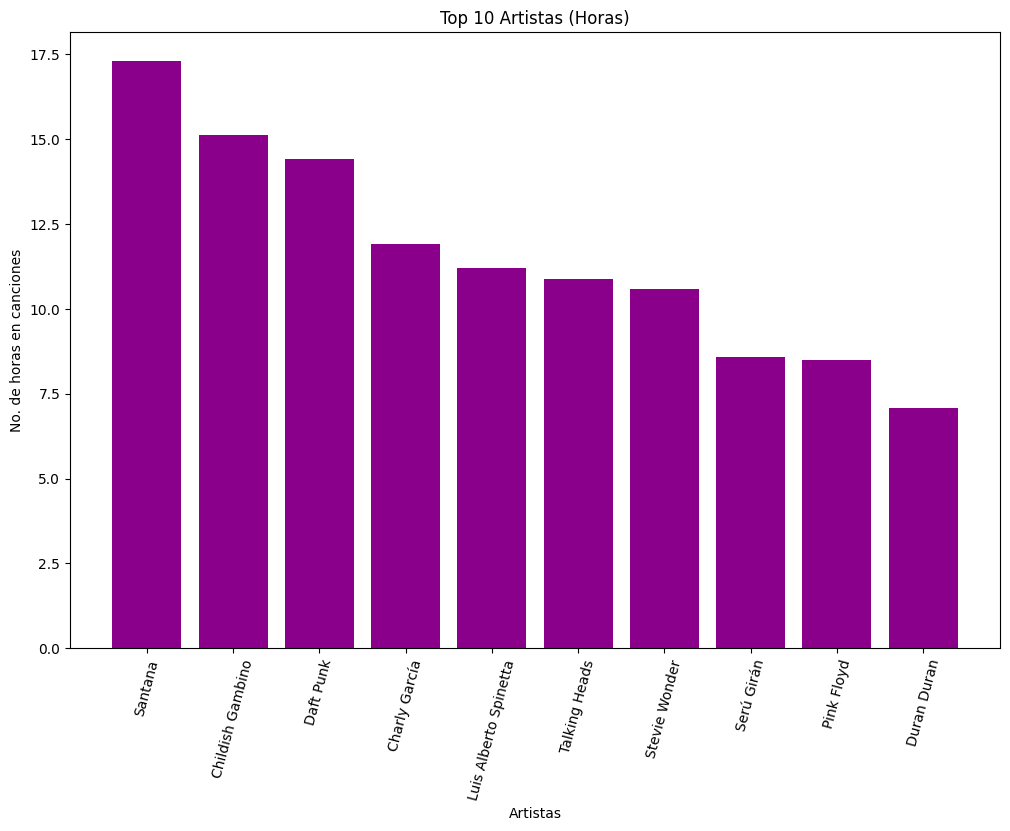

In [13]:
fig,ax = plt.subplots(figsize=(12,8))
ax.bar(top_artists.head(10).index,top_artists["Listening Time (Hours)"].head(10), color='darkmagenta')
ax.set(title="Top 10 Artistas (Horas)",xlabel="Artistas",ylabel="No. de horas en canciones");
plt.xticks(rotation=75);

In [14]:
fav_artist = data.groupby(["artistName"])["Count"].count()
fav_artist.sort_values(ascending=False).head(100)

artistName
Charly García                              427
Luis Alberto Spinetta                      427
Santana                                    418
Daft Punk                                  353
Serú Girán                                 343
                                          ... 
Patricio Rey y sus Redonditos de Ricota     55
Pearl Jam                                   54
AC/DC                                       54
Parliament                                  53
Juan Carlos Baglietto                       53
Name: Count, Length: 100, dtype: int64

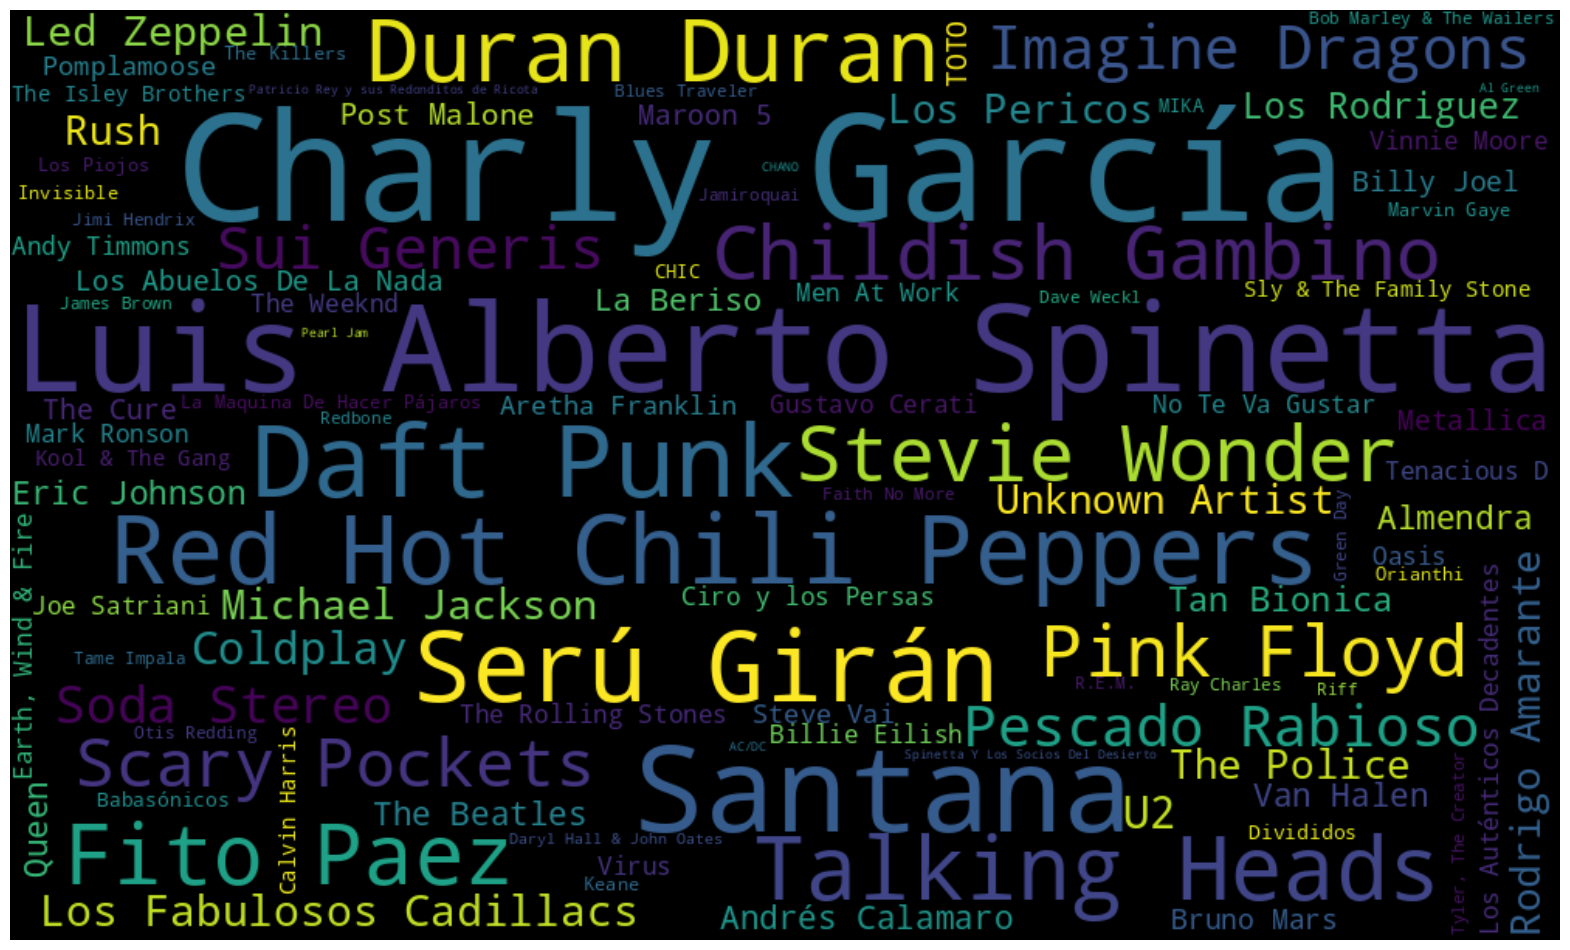

In [15]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_artist)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

## Canciones

In [16]:
song = "rockstar (feat. 21 Savage)"
song_ocurrences = data[data['trackName'] == song]
song_ocurrences

,artistName,trackName,msPlayed,playTime,year,month,day,weekday,time,hours,day-name,Count,Listening Time (Hours),Listening Time (Minutes)
179,Post Malone,rockstar (feat. 21 Savage),218151,2019-06-13 23:47:00,2019,6,13,3,23:47:00,23,Thursday,1,0.061,3.633
232,Post Malone,rockstar (feat. 21 Savage),218146,2019-06-14 17:28:00,2019,6,14,4,17:28:00,17,Friday,1,0.061,3.633
324,Post Malone,rockstar (feat. 21 Savage),131317,2019-06-15 10:45:00,2019,6,15,5,10:45:00,10,Saturday,1,0.036,2.183
325,Post Malone,rockstar (feat. 21 Savage),218146,2019-06-15 13:28:00,2019,6,15,5,13:28:00,13,Saturday,1,0.061,3.633
335,Post Malone,rockstar (feat. 21 Savage),200713,2019-06-15 14:41:00,2019,6,15,5,14:41:00,14,Saturday,1,0.056,3.333
475,Post Malone,rockstar (feat. 21 Savage),210860,2019-06-17 01:31:00,2019,6,17,0,01:31:00,1,Monday,1,0.058,3.500
1889,Post Malone,rockstar (feat. 21 Savage),218146,2019-07-07 02:05:00,2019,7,7,6,02:05:00,2,Sunday,1,0.061,3.633
2064,Post Malone,rockstar (feat. 21 Savage),218146,2019-07-07 21:36:00,2019,7,7,6,21:36:00,21,Sunday,1,0.061,3.633
2120,Post Malone,rockstar (feat. 21 Savage),96502,2019-07-08 23:58:00,2019,7,8,0,23:58:00,23,Monday,1,0.027,1.600
2470,Post Malone,rockstar (feat. 21 Savage),218146,2019-07-14 02:53:00,2019,7,14,6,02:53:00,2,Sunday,1,0.061,3.633


In [17]:
print("Veces que se escucho la canción", song, len(song_ocurrences))
print("Tiempo escuchado (en ms): ", sum(song_ocurrences["msPlayed"]))

Veces que se escucho la canción rockstar (feat. 21 Savage) 46
Tiempo escuchado (en ms):  5642901


In [18]:
top_songs_time = data.groupby(["trackName"])[["Listening Time (Hours)","Listening Time (Minutes)","Count"]].sum().sort_values(by="Listening Time (Minutes)",ascending=False)
top_songs_count = data.groupby(["trackName"])[["Listening Time (Hours)","Listening Time (Minutes)","Count"]].sum().sort_values(by="Count",ascending=False)
top_songs_time.head(10)

,Listening Time (Hours),Listening Time (Minutes),Count
trackName,,,
Redbone,6.749,403.449,94
Something About Us,6.629,399.861,116
Samba Pa Ti,5.222,313.140,106
Higher Ground,4.922,294.994,76
Fool in the Rain - 2012 Remaster,4.365,261.446,65
Electric Gypsy,4.242,254.099,83
Rosanna,3.400,203.960,56
Tuyo (Narcos Theme) - A Netflix Original Series Soundtrack,3.366,199.896,143
Highly Strung,3.164,189.627,68


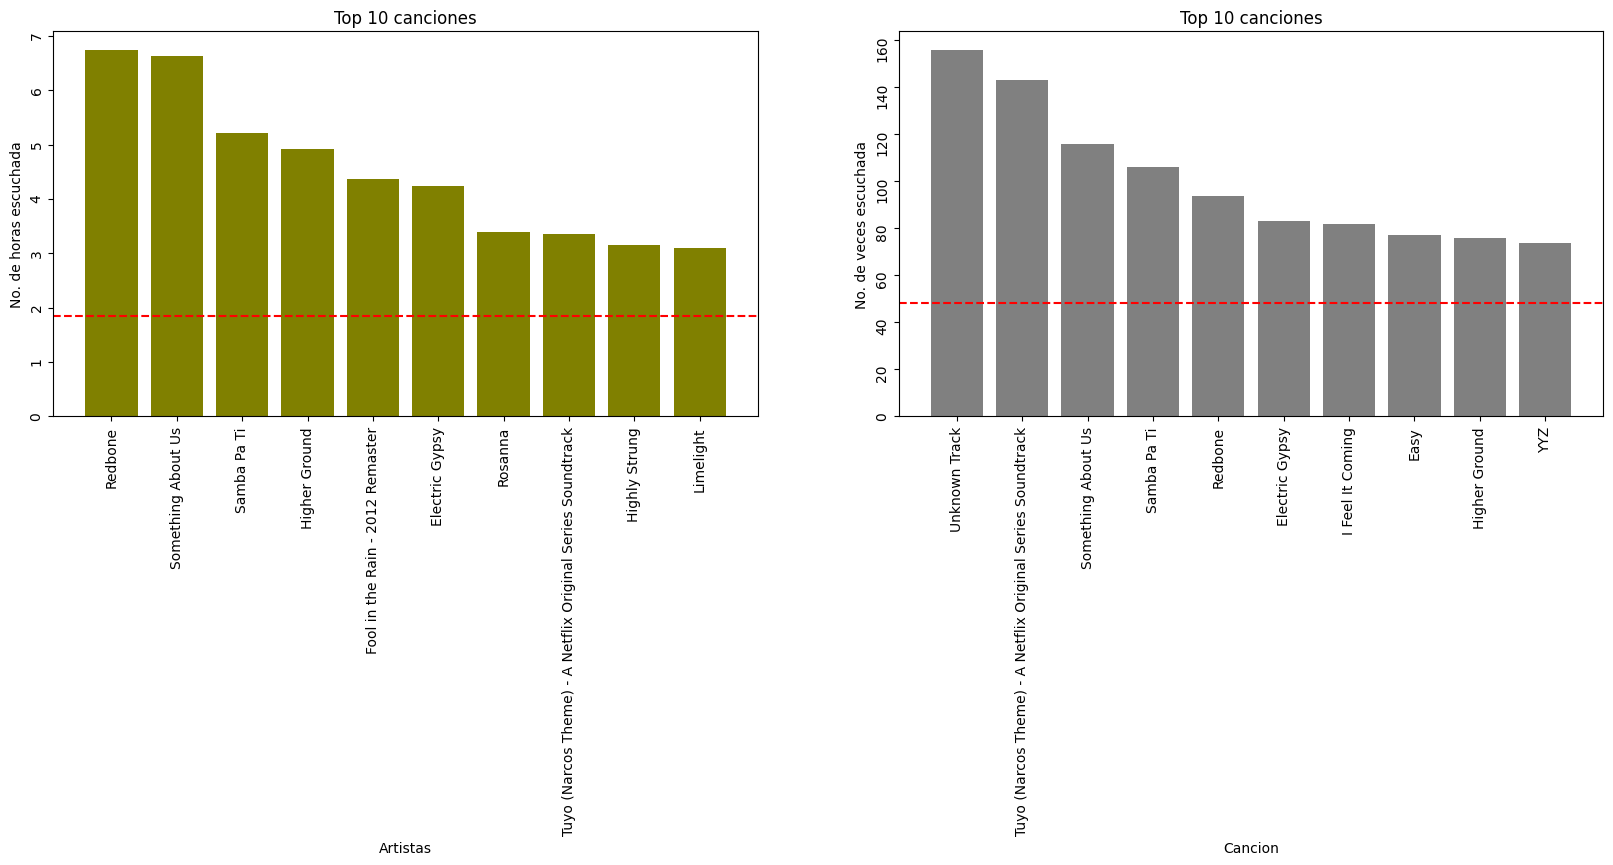

In [19]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,5))

# Setting up our first graph
ax1.bar(top_songs_time.head(10).index,top_songs_time["Listening Time (Hours)"].head(10), color="olive")
ax1.set(title="Top 10 canciones",xlabel="Artistas",ylabel="No. de horas escuchada");
ax1.tick_params(labelrotation=90);
ax1.axhline(top_songs_time["Listening Time (Hours)"][:100].mean(), linestyle="--", color="r")

# Setting up our second graph
ax2.bar(top_songs_count.head(10).index,top_songs_count["Count"].head(10), color="gray")
ax2.set(title="Top 10 canciones",xlabel="Cancion",ylabel="No. de veces escuchada");
ax2.tick_params(labelrotation=90);
ax2.axhline(top_songs_count["Count"][:100].mean(), linestyle="--", color="r");

In [20]:
fav_songs = data.groupby(["trackName"])["Count"].count()

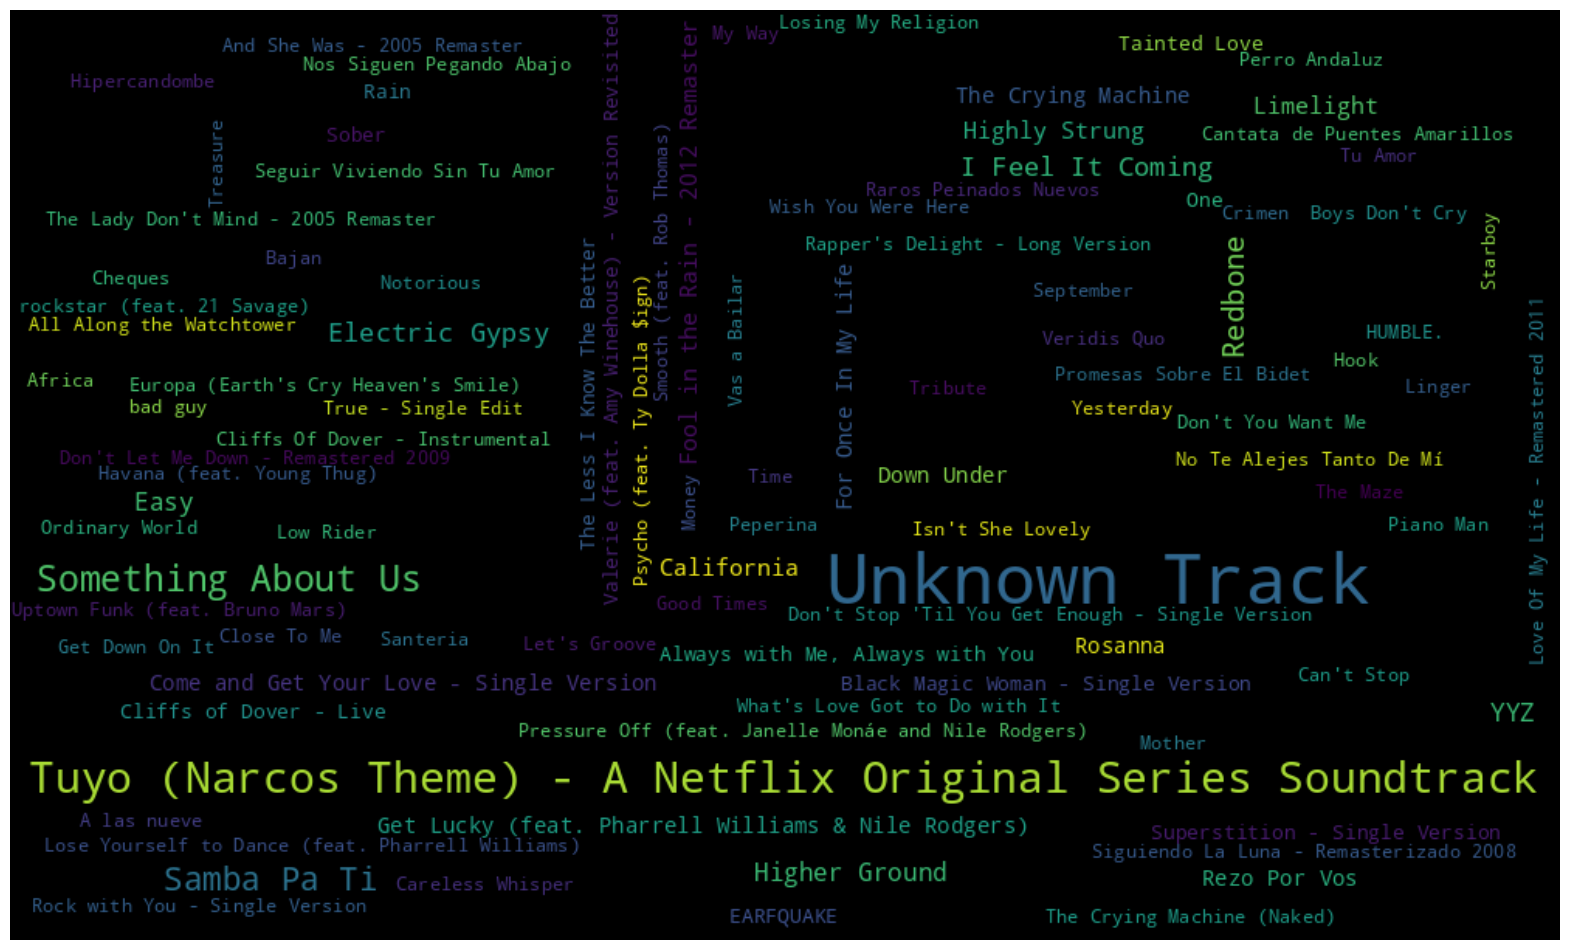

In [21]:
fig, ax = plt.subplots(figsize=(20,15))
wordcloud = WordCloud(width=1000,height=600, max_words=100,relative_scaling=1,normalize_plurals=False).generate_from_frequencies(fav_songs)
ax.imshow(wordcloud, interpolation='bilinear')
plt.axis(False);

## Días

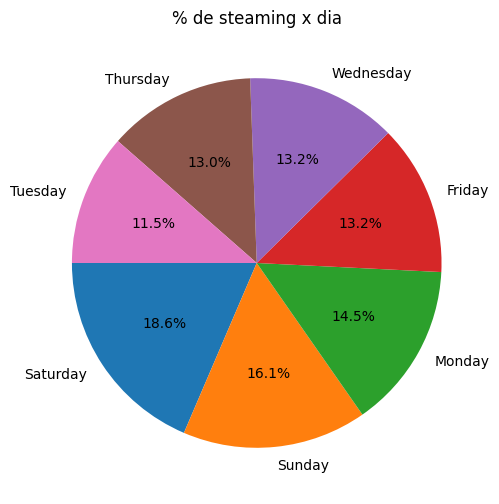

In [23]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.pie(data["day-name"].value_counts(), labels=data["day-name"].value_counts().index, autopct='%1.1f%%', startangle=180);
ax.set(title="% de steaming x dia");

In [25]:
active_usage = data.groupby(['hours', 'day-name'])['artistName'].size().reset_index()
active_usage_pivot = active_usage.pivot("hours", 'day-name', 'artistName')
active_usage_pivot.head()

day-name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
hours,,,,,,,
0,39.0,131.0,148.0,284.0,237.0,130.0,96.0
1,58.0,193.0,77.0,287.0,51.0,52.0,24.0
2,100.0,127.0,298.0,144.0,54.0,40.0,59.0
3,181.0,96.0,87.0,174.0,65.0,75.0,106.0
4,189.0,56.0,56.0,191.0,37.0,36.0,73.0


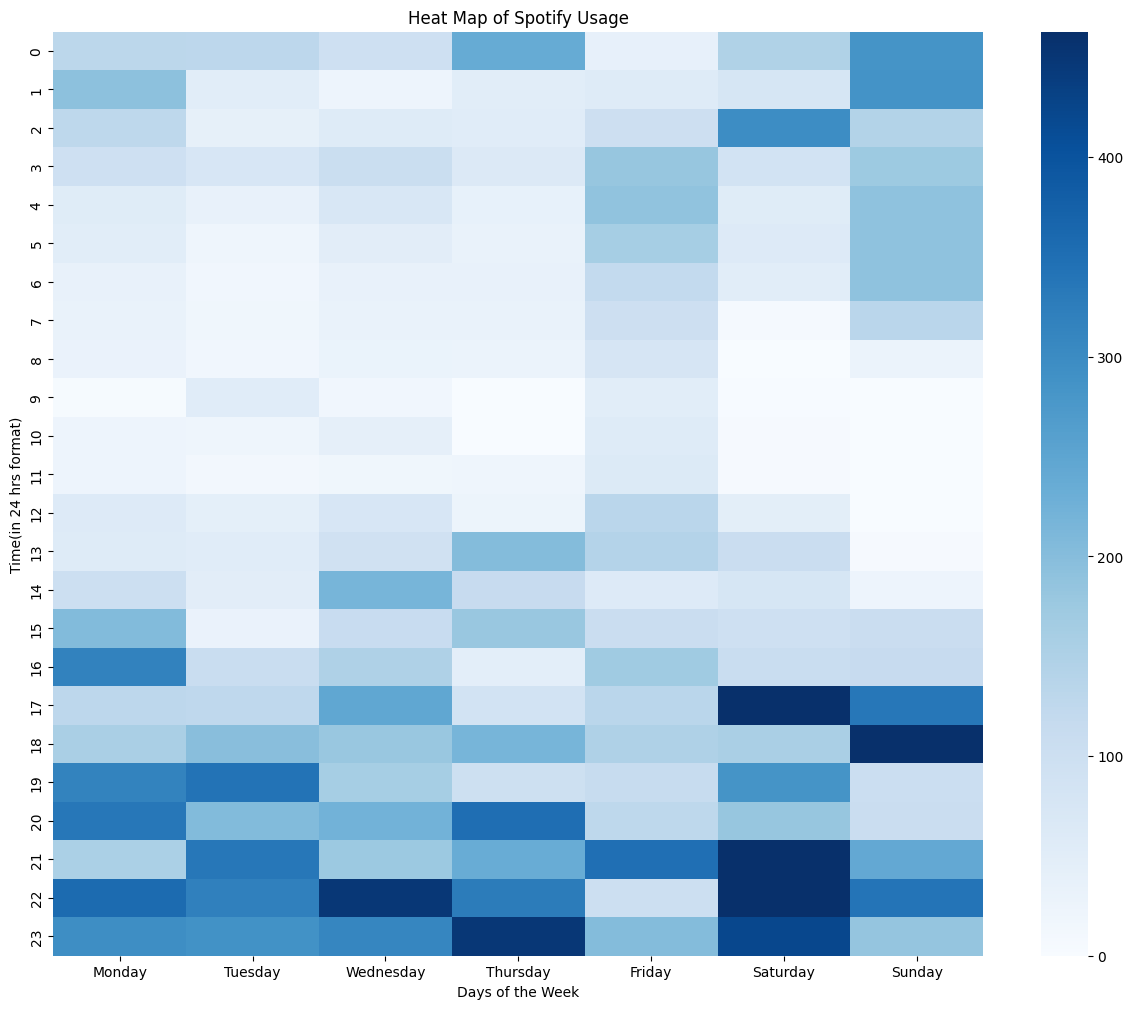

In [26]:
days = ["Monday", 'Tuesday', "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

fig, ax = plt.subplots(figsize=(15,12))
ax = sns.heatmap(active_usage_pivot[days].fillna(0), robust=True, cmap="Blues", ax = ax);
ax.set(title="Heat Map of Spotify Usage", xlabel="Days of the Week",ylabel="Time(in 24 hrs format)");